<a href="https://colab.research.google.com/github/choarauc/form/blob/main/155_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



<hr style="border-width:2px;border-color:#75DFC1">
<h2 style = "text-align:center"> Tensorflow - Face Detection</h2> 
<hr style="border-width:2px;border-color:#75DFC1">

> Dans cet examen, nous allons tester vos connaissances sur les idées et concepts de base de Tensorflow. Suite à un exercice court sur un problème d'optimisation, nous testerons ensuite votre capacité à implémenter un réseau de neurones et une métrique pour un problème de régression.
>
> L'exercice est composé de plusieurs questions, **faites-les dans l'ordre et faites attention à respecter le nom des variables**. 


<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> Exercice: Warm Up!</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> Soit $f(x)=\exp{(x-2)} + 15x² + 50x + 1$.
> 
> L'objectif de cet exercice est de trouver la valeur <b>x</b> qui minimise la fonction f.


* Afficher la courbe de la fonction f entre [-5, 5]


* Trouver graphiquement la valeur approximative x qui minimise la fonction f.

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
x = tf.Variable (1.0)

#fonction f(x)=exp(x−2)+15x²+50x+1

def f(x):
    # Création de "two" via un objet de type constant
    f1 = tf.constant(1.0, dtype=tf.float32)
    
    # Application d'un bloc with afin de définir une sous-boîte via la fonction name_scope appliquée à 'Function'
    with tf.name_scope('Function'):
        f_x = tf.exp ( x - 2 ) + (15* x**2 )+ (50 * x) + f1

    return f_x


f(x).numpy()

66.36788

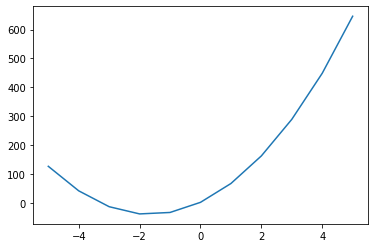

entre -2 et -1


In [ ]:
liste_x = [-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0  ]
liste_y = []

for i in liste_x : 

    liste_y.append (f(i).numpy())

liste_y
plt.plot (liste_x,liste_y)
plt.show()

print("entre -2 et -1")

Comme  ∂f(x)∂x=0∂f(x)∂x=0  n'admet pas de solution explicite, trouver la valeur numérique x qui minimise la fonction f en utilisant des descentes de gradient.
Est-ce que la solution est cohérente avec la solution trouvée graphiquement ?

In [ ]:
def f_p(x):
    e0_p = tf.exp ( tf.subtract ( tf.Variable( x ) , tf.constant ( 2.0,dtype=tf.float32 ) ))       
    e1_p = tf.Variable ( tf.constant (30.0,dtype=tf.float32) * tf.Variable(x))
    e2_p = tf.constant (50.0,dtype=tf.float32) 
  
    return  e0_p.numpy() + e1_p.numpy() + e2_p.numpy()

pour x =  -5.0
-99.999084
pour x =  -4.0
-69.99752
pour x =  -3.0
-39.993263
pour x =  -2.0
-9.981686
pour x =  -1.0
20.049788
pour x =  0.0
50.135334
pour x =  1.0
80.36788
pour x =  2.0
111.0
pour x =  3.0
142.71829
pour x =  4.0
177.38905
pour x =  5.0
220.08554


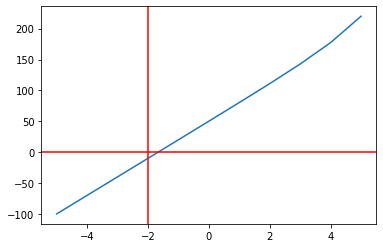

In [ ]:
y_p = []

for i in liste_x : 
    print ('pour x = ',i)
    print (f_p(i))
    y_p.append (f_p(i))
    
plt.plot (liste_x,y_p)
plt.axhline(0,c ='red')
plt.axvline(-2,c ='red')
plt.show();

#oui c est coherent car = 0 entre -2 - 1

Afficher la valeur du gradient en cette valeur.

Est-ce que la valeur du gradient est cohérente ?

In [ ]:

liste_x = [-5.0 , -4.0 , -3.0 , -2.0 , -1.0 , 0.0 , 1.0 , 2.0 , 3.0 , 4.0 ,5.0  ]


for i in range (-5,6):
    x.assign( float (i))
    with tf.GradientTape() as tape:
        function = f(x)
        
    grad = tape.gradient(function, x)
    print ('x=',i)
    print(grad.numpy())

x= -5
-99.999084
x= -4
-69.99752
x= -3
-39.993263
x= -2
-9.981686
x= -1
20.049786
x= 0
50.135334
x= 1
80.367874
x= 2
111.0
x= 3
142.71828
x= 4
177.38905
x= 5
220.08554


In [ ]:
f_p (-1.668)

-0.014472961

Shape of X : (100,)
Shape of y : (100,)


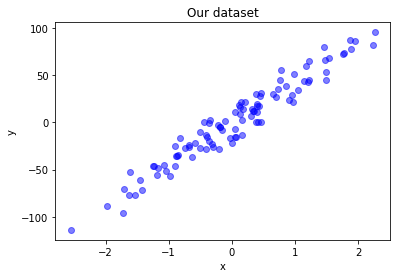

In [ ]:
%matplotlib inline
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np

X, y = make_regression(n_samples=100, 
                       n_features=1,
                       n_informative=1,
                       noise=10,
                       random_state=0)

X = np.squeeze(X)

# plot data 
plt.scatter(X, y, color='blue', alpha=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Our dataset')
# display plot
print('Shape of X :', X.shape)
print('Shape of y :', y.shape)
plt.show()

In [ ]:
#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1

class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation de tf.keras.Model
        super(Polynomial, self).__init__()
        # Instantier la variable w0.
        self.w0 = tf.Variable(tf.random.normal([1]), name='w0')
        
        # Instantier la variable w1.
        self.w1 = tf.Variable(tf.random.normal([1]), name='w1')
        
        # Instantier la variable w2.
        self.w2 = tf.Variable(tf.random.normal([1]), name='w2')
               
        # Instantier la variable b.
        self.b = tf.Variable(tf.random.normal([1]), name='bias')
        
    def __call__(self, inputs, training=True):
        # Prédiction de notre modèle.
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2* tf.exp (inputs)

In [ ]:
import tensorflow as tf
import numpy as np

def f(x):
    e0 = tf.exp ( tf.subtract ( tf.Variable(x) , tf.constant (2.0,dtype=tf.float32) , name='e0' ))       
    e1 = tf.Variable ( tf.constant (15.0,dtype=tf.float32) * tf.Variable(x)**2, name='e1')
    e2 = tf.Variable( tf.constant (50.0,dtype=tf.float32) * tf.Variable(x), name='e2')
    b =  tf.constant (1.0,dtype=tf.float32, name='b')
    return b + e0 + e1 + e2

import matplotlib.pyplot as plt


f([5.0,1.0] ).numpy()

array([646.0856 ,  66.36788], dtype=float32)

In [ ]:
x = tf.Variable (3.0)

#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1
def f(x):
    # Création de "two" via un objet de type constant
    one = tf.constant(1.0, dtype=tf.float32)
    
    # Application d'un bloc with afin de définir une sous-boîte via la fonction name_scope appliquée à 'Function'
    with tf.name_scope('Function'):
        f_x = tf.exp ( x - 2 ) + (15* x**2 )+ (50 * x) + one

    return f_x


f(x).numpy()

288.71826

In [ ]:
x.assign(4.0)
# Compute f(4)


for i in range (-5,5):
    x.assign( float (i))
    with tf.GradientTape() as tape:
        function = f(x)
        
    grad = tape.gradient(function, x)
    print(grad.numpy())

-99.999084
-69.99752
-39.993263
-9.981686
20.049786
50.135334
80.367874
111.0
142.71828
177.38905


In [ ]:
#fonction a modeliser f(x)=exp(x−2)+15x²+50x+1

class Polynomial(tf.keras.Model):
    def __init__(self):
        # Initialisation de tf.keras.Model
        super(Polynomial, self).__init__()
        # Instantier la variable w0.
        self.w0 = tf.Variable( 50.0, name='w0')
        
        # Instantier la variable w1.
        self.w1 = tf.Variable(15.0, name='w1')
        
        # Instantier la variable w2.
        self.w2 = tf.Variable(1.0, name='w2')
               
        # Instantier la variable b.
        self.b = tf.constant (1.0, name='bias')
        
    def __call__(self, inputs, training=True):
        # Prédiction de notre modèle.
        return self.b + self.w0*inputs + self.w1*inputs**2 + self.w2* tf.exp (inputs - 2.0 )

In [ ]:
model = Polynomial()
# Optimizer
optimizer = tf.keras.optimizers.Adam(1e-1)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [ ]:
training_history = model.fit(x, y, batch_size=16, epochs=10)

ValueError: ignored

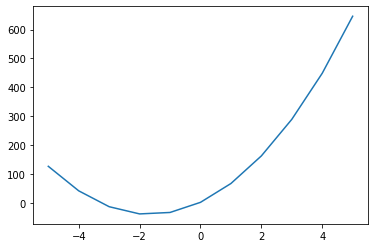

In [ ]:
#y_pred = model([-5,2])

pred = []
for i in liste_x : 
    pred.append ( model (i) )
    
plt.plot (liste_x,pred)

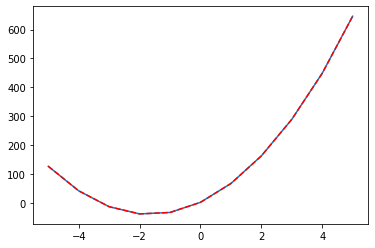

In [ ]:
liste_x = [-5.0,-4.0,-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0  ]
liste_y = []

for i in liste_x : 

    liste_y.append (f(i).numpy())

liste_y
plt.plot (liste_x,liste_y)

plt.plot (liste_x, pred,'r--')
plt.show();

In [ ]:
# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(liste_x, y, alpha=0.5, label = 'True value')
# Afficher la prédiction de X.
plt.plot(liste_x, pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()

In [ ]:
# Afficher l'évolution de la fonction de perte
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.plot(training_history.history['loss'])
plt.xlabel('Iteration')
plt.title('Valeur de la fonction de perte')

plt.subplot(122)
# Afficher les points (x, y).
plt.scatter(X, y, alpha=0.5, label = 'True value')
# Afficher la prédiction de X.
plt.plot(np.linspace(-2.5, 2.5, 100), y_pred, 'r', label = 'Prediction')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Prediction')
plt.legend()
plt.show()

Problème de régression : Détection de la boîte englobant le visage

<hr style="border-width:2px;border-color:#75DFC1">
<h3 style = "text-align:center"> Problème de régression : Détection de la boîte englobant le visage</h3> 
<hr style="border-width:2px;border-color:#75DFC1">

> Dans cet examen, nous allons former un modèle permettant de trouver les coordonnées du rectangle englobant le visage d'une personne. Nous travaillerons sur des images provenant de vidéo YouTube stocké sous forme d'image dans le dossier **imgs"**. Les cordonnées des points à l'extrémité du rectangle englobant le visage sont sous forme de CSV.
>
><img src='https://datascientest.fr/train/assets/exam_tensorflow_box.png'>
>

* Exécuter la cellule suivante pour charger les images dans la variable <b>X</b>.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os

X = []
for p in os.listdir('imgs'):
    X.append(plt.imread('imgs/'+p))

X = np.array(X)
print('Shape of X :', X.shape)

FileNotFoundError: ignored

Charger le fichier "face_boxe.csv" sous le nom df.

In [ ]:
import pandas as pd

df = pd.read_csv ('face_boxe.csv')

df.head()

Exécuter la cellule suivante pour afficher des images du jeu de données ainsi que le rectangle englobant le visage correspondant.

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
j=1
for i in np.random.randint(0, len(df), size=[8]):
    plt.subplot(2,4,j)
    plt.axis('off')
    img = X[i]
    plt.imshow(img)
    x_min = df.xmin[i]
    x_max = df.xmax[i]
    y_min = df.ymin[i]
    y_max = df.ymax[i]
    plt.plot([x_min, x_max, x_max, x_min, x_min], [y_min, y_min, y_max, y_max, y_min], '-b')
    j+=1

Pour localiser une unique boîte encadrant la voiture dans l'image, nous pouvons se ramener à un problème de régression sur 4 variables cibles suivante.



xmoyxmoy  : position horizontale (normalisé) du milieu de la boîte.
ymoyymoy  : position verticale (normalisé) du milieu de la boîte.
w : largeur (normalisé) de la boîte.
h : hauteur (normalisé) de la boîte.
Les valeurs de  xmoyxmoy ,  ymoyymoy , w et h doivent être comprises entre 0 et 1. Il est donc nécessaire de diviser les valeurs de  xmoyxmoy ,  ymoyymoy , w et h par 256.

Mettre en forme les données.

In [ ]:
df = df/256
df

Séparer le jeu de données en un ensemble d'entraînement et en un ensemble de validation.

## Modèle :

> Vous allez maintenant définir un modèle convolutionnel permettant de prédire les valeurs <b>$x_{moy}$</b>, <b>$y_{moy}$</b>, <b>w</b> et <b>h</b> en fonction des images en entrée.
>
><img src=https://datascientest.fr/train/assets/masterclass_deeplearning_regressionmodel.png style='width:500px'>


* En vous **inspirant** de l'image précédente, définir un modèle convolutionnel permettant d'estimer les paramètres <b>X</b>, <b>Y</b>, <b>w</b> et <b>h</b>.

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense

lenet = tf.keras.Sequential()

lenet.add(Conv2D(filters = 30,                  
                kernel_size = (5, 5),            
                input_shape = (28, 28, 1),      
                activation = 'relu'))       

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Conv2D(filters = 16,                    
                kernel_size = (3, 3),
                activation = 'relu'))

lenet.add(MaxPooling2D(pool_size = (2, 2)))

lenet.add(Flatten())

lenet.add(Dropout(rate = 0.2))

lenet.add(Dense(units = 128, activation = 'relu'))

lenet.add(Dense(units = 4 , activation = 'softmax'))

lenet.summary()

> Nous allons utiliser la fonction de coût suivante :
>
>$$\mathcal{Loss}= (x_{pred}-x_{true})^2+(y_{pred}-y_{true})^2 + (\sqrt{|w_{pred}|}-\sqrt{w_{true}}\ )^2 + (\sqrt{|h_{pred}|}-\sqrt{h_{true}}\ )^2  $$

<div class="alert alert-info">
<i class="fa fa-info-circle"></i> &emsp; 
Astuce : Vous pouvez découper un tensor <b>X</b> en prenant toutes les lignes (:) mais en gardant qu'une colonne spécifique (i) en effectuant l'opéraction X[:, i].
</div>

* Définir une fonction retournant le résultat de la fonction de coût ci-dessus.

Entraîner votre modèle sur un nombre d'itérations faibles (moins de 5 minutes d'entraînement).

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img.

In [ ]:
import numpy as np
def show_img(img, x0, y0, w0, h0):
    plt.imshow(img)
    x0 = np.abs(x0)
    y0 = np.abs(y0)
    w0 = np.abs(w0)
    h0 = np.abs(h0)
    x1= (x0-w0/2)*256
    x2= (x0+w0/2)*256
    y1= (y0-h0/2)*256
    y2= (y0+h0/2)*256
    plt.plot([x1,x2,x2,x1,x1], [y1,y1,y2,y2,y1], "r")
## Insérez votre code ici


Nous vous rappelons que nous avons entraîné notre modèle que sur peu d'itération ce qui explique de mauvais résultat.

Exécuter la cellule suivante pour charger un modèle entraîné sur ce jeu de données plus de 5 heures.

In [ ]:
from tensorflow.keras.models import model_from_json
# load json and create model
json_file = open('model.json', 'r')
model = json_file.read()
json_file.close()
# Load model
model = model_from_json(model)
# Load weights
model.load_weights('./weights/face_detection')

Afficher pour une des images de l'ensemble de validation le rectangle estimé par notre modèle à l'aide de la fonction show_img.

Avec la fonction url_to_image, vous pouvez charger une image à partir d'un lien URL.

Prédire le rectangle encadrant le visage avec des images sur internet.

In [ ]:
import urllib
import cv2
def url_to_image(url):
    resp = urllib.request.urlopen(url) 
    img = np.asarray(bytearray(resp.read()), dtype="uint8")
    img = cv2.imdecode(img, -1)
    img = cv2.resize(img[:,:,[2,1,0]], (256, 256))
    return img

## Example :
img = url_to_image("https://starbyface.com/ImgBase/testPhoto/test1.jpg")

## Insérez votre code ici

## Évaluation : Intersection over Union (partie optionnelle)

> **Intersection over Union** (IoU) est la métrique d'évaluation la plus populaire utilisée dans les tests de référence de détection d'objets. Cependant, il existe un écart entre les optimisations couramment utilisées pour régresser les paramètres d'une boîte englobante et la maximisation de cette métrique.
>
> <img src='https://datascientest.fr/train/assets/exam_tensorflow_over_union.png' style='width:500px'>
>
> Nous allons nous intéresser dans cette partie à évaluer notre modèle à l'aide de cette métrique.
>
><img src='https://datascientest.fr/train/assets/exam_tensorflow_iou_ab.jpg' style='width:700px'>
>
>Avec :
>
>$$ x_A = \max(x_{11}, x_{21}) $$
>$$ y_A = \max(y_{11}, y_{21}) $$
>$$ x_B = \min(x_{12}, x_{22}) $$
>$$ y_B = \min(y_{12}, y_{22}) $$
>
>L'air de la zone d'intersection s'écrit :
>
>$$\mathcal{A}_{intersection} = \max(x_B-x_A, 0) \cdot \max(y_B - y_A, 0) $$
>
>L'air de la zone d'union s'écrit :
>
>$$\mathcal{A}_{union} = \mathcal{A}_1 + \mathcal{A}_2 - \mathcal{A}_{intersection} $$
>
>C'est-à-dire :
>
>$$\mathcal{A}_{union} = (x_{12}-x_{11})\cdot(y_{12}-y_{11}) + (x_{22}-x_{21})\cdot(y_{22}-y_{21}) - \mathcal{A}_{intersection}$$
>
> La métrique "intersection over Union" s'écrit donc :
>
>$$ IoU = \frac{\mathcal{A}_{intersection}}{\mathcal{A}_{union}}$$


* Définir dans une fonction `iou` avec comme arguments **y_true** (de taille [n_img, 4]) et **y_pred** (de taille [n_img, 4]):
    * Définir <b>x1</b>, <b>y1</b>, <b>w1</b> et <b>h1</b> les coordonnées de **y_true**.
    * Définir <b>x2</b>, <b>y2</b>, <b>w2</b> et <b>h2</b> les coordonnées de **y_pred**. Appliquer la fonction valeur absolue à ses paramètres (lors du training, le modèle ne distingue pas les valeurs négatives des valeurs positives).
    * Calculer <b>xA</b>, <b>yA</b>, <b>xB</b> et <b>yB</b> à l'aide de la fonction `maximum` de **tensorflow**.
    * Calculer l'air de la zone d'intersection.
    * Calculer l'air de la zone d'union.
    * Retourner la valeur IoU.

In [ ]:
import tensorflow as tf

def IoU(y_pred, y_true):
    I = tf.reduce_sum(y_pred * y_true, axis=(1, 2))
    U = tf.reduce_sum(y_pred + y_true, axis=(1, 2)) - I
    return tf.reduce_mean(I / U)

Calculer la métrique IoU de notre modèle sur l'échantillon de validation.